## >> Import libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## >> Calling and reading files.

In [3]:
import pandas as pd 
customers_df = pd.read_csv(r'D:\Data Analysis\DEPI\TECHNICAL\Project\Final Project\Data Worked on\Final Project #3\Customers.csv')
orders_df = pd.read_csv(r'D:\Data Analysis\DEPI\TECHNICAL\Project\Final Project\Data Worked on\Final Project #3\Orders.csv')
products_df = pd.read_csv(r'D:\Data Analysis\DEPI\TECHNICAL\Project\Final Project\Data Worked on\Final Project #3\products.csv')
sales_df = pd.read_csv(r'D:\Data Analysis\DEPI\TECHNICAL\Project\Final Project\Data Worked on\Final Project #3\sales.csv')

## >> Reading column headers 

In [4]:
print("Customers Columns:", customers_df.columns)
print("Orders Columns:", orders_df.columns)
print("Products Columns:", products_df.columns)
print("Sales Columns:", sales_df.columns)

Customers Columns: Index(['Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Region'],
      dtype='object')
Orders Columns: Index(['OrderID', 'Order_Date', 'Ship_Date', 'Ship_Mode'], dtype='object')
Products Columns: Index(['Product_ID', 'Category', 'Sub_Category', 'Product_Name'], dtype='object')
Sales Columns: Index(['RowID', 'OrderID', 'Product_ID', 'Customer_ID', 'Amount'], dtype='object')


## >> Data Check

In [14]:
#Customers
customers_df.isnull().any()  
print("***********************************************")
customers_df.info() 

***********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    793 non-null    int64 
 1   Customer_Name  793 non-null    object
 2   Segment        793 non-null    object
 3   Country        793 non-null    object
 4   City           793 non-null    object
 5   State          793 non-null    object
 6   Region         793 non-null    object
dtypes: int64(1), object(6)
memory usage: 43.5+ KB


In [15]:
#Orders
orders_df.isnull().any()
print("***********************************************")
orders_df.info() 

***********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     4922 non-null   int64 
 1   Order_Date  4922 non-null   object
 2   Ship_Date   4922 non-null   object
 3   Ship_Mode   4922 non-null   object
dtypes: int64(1), object(3)
memory usage: 153.9+ KB


In [16]:
#Products
products_df.isnull().any() 
print("***********************************************")
products_df.info() 


***********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    1594 non-null   int64 
 1   Category      1594 non-null   object
 2   Sub_Category  1594 non-null   object
 3   Product_Name  1594 non-null   object
dtypes: int64(1), object(3)
memory usage: 49.9+ KB


In [17]:
#Sales
sales_df.isnull().any()   
print("***********************************************")
sales_df.info() 

***********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RowID        9800 non-null   int64  
 1   OrderID      9800 non-null   int64  
 2   Product_ID   9800 non-null   int64  
 3   Customer_ID  9800 non-null   int64  
 4   Amount       9800 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 382.9 KB


In [19]:
# Some Checks
sales_df.loc[sales_df["Amount"] <= 0]          # check if sales columns have invalid values
print("***********************************************")

customers_df["Country"].unique()           # check if there is another countries rather than United States


***********************************************


array(['United States'], dtype=object)

In [20]:
customers_df.drop(columns="Country",inplace = True)  # There is only one country so it will not be useful in our analysis

## >> Marge Tables and print Final

In [21]:
# دمج sales مع orders بناءً على OrderID
sales_orders_df = pd.merge(sales_df, orders_df, on='OrderID', how='inner')

# دمج sales_orders_df مع customers بناءً على Customer_ID
sales_customers_df = pd.merge(sales_orders_df, customers_df, on='Customer_ID', how='inner')

# دمج sales_customers_df مع products بناءً على Product_ID
final_merged_df = pd.merge(sales_customers_df, products_df, on='Product_ID', how='inner')

# عرض النتائج النهائية
print(final_merged_df.head())

   RowID  OrderID  Product_ID  Customer_ID  Amount  Order_Date   Ship_Date  \
0      1   132465    10000277        13525  210.68   9/11/2016   9/15/2016   
1      2   132465    10003641        13525   78.80   9/11/2016   9/15/2016   
2      3   132465    10001998        13525   19.99   9/11/2016   9/15/2016   
3      4   132465    10001932        13525  772.68   9/11/2016   9/15/2016   
4      5   166373    10002323        15565  106.08  10/21/2017  10/25/2017   

        Ship_Mode Customer_Name    Segment           City     State   Region  \
0    Second Class    Don Miller  Corporate  New York City  New York     East   
1    Second Class    Don Miller  Corporate  New York City  New York     East   
2    Second Class    Don Miller  Corporate  New York City  New York     East   
3    Second Class    Don Miller  Corporate  New York City  New York     East   
4  Standard Class    Jill Fjeld   Consumer        Decatur  Illinois  Central   

          Category Sub_Category  \
0        Furnit

## >> Create Datetime Table

In [22]:
# Convert Date to datetime column
final_merged_df['Order_Date'] = pd.to_datetime(final_merged_df['Order_Date'])
final_merged_df['Ship_Date'] = pd.to_datetime(final_merged_df['Ship_Date'])

# Generate a range of dates
start_date = final_merged_df["Order_Date"].min()
end_date =  final_merged_df["Ship_Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame
datetime = pd.DataFrame(date_range, columns=['Date'])

# Save
datetime.to_csv(r'D:\Data Analysis\DEPI\TECHNICAL\Project\Final Project\Data Worked on\Final Project #3\DateTime.csv',index=False)

## @@ Exploring the data randomly

In [23]:
final_merged_df.sample(10)

,RowID,OrderID,Product_ID,Customer_ID,Amount,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,Category,Sub_Category,Product_Name
2215,2216,124800,10001750,19540,263.960,2016-09-26,2016-09-30,Standard Class,Rick Wilson,Corporate,Seattle,Washington,West,Technology,Phones,Samsung Rugby III
9315,9316,115259,10002504,19960,130.464,2015-08-25,2015-08-27,Second Class,Ryan Crowe,Consumer,Baltimore,Maryland,East,Office Supplies,Envelopes,"Tyvek Top-Opening Peel & Seel Envelopes, Plai..."
3057,3058,140536,10001545,21385,7.040,2018-04-04,2018-04-05,First Class,Tom Ashbrook,Home Office,New York City,New York,East,Furniture,Chairs,Hon Comfortask Task/Swivel Chairs
539,540,119438,10000804,11980,2.688,2018-03-18,2018-03-23,Standard Class,Carol Darley,Consumer,Medford,Oregon,West,Office Supplies,Appliances,Hoover Portapower Portable Vacuum
3282,3283,113516,10001989,21685,67.136,2017-09-08,2017-09-10,Second Class,Valerie Mitchum,Home Office,Marietta,Georgia,South,Office Supplies,Binders,Premium Transparent Presentation Covers by GBC
3979,3980,139759,10002774,18310,40.784,2016-08-25,2016-08-30,Standard Class,Nancy Lomonaco,Home Office,Danville,California,West,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray"
2185,2186,117247,10002958,12760,652.450,2018-10-09,2018-10-14,Standard Class,Cyma Kinney,Corporate,Glendale,Arizona,West,Furniture,Tables,"Bevis Oval Conference Table, Walnut"
5735,5736,159464,10002185,21355,34.750,2018-05-18,2018-05-19,First Class,Todd Boyes,Corporate,New York City,New York,East,Technology,Phones,QVS USB Car Charger 2-Port 2.1Amp for iPod/iPh...
9109,9110,166184,10002624,14830,469.990,2018-03-24,2018-03-27,First Class,Harold Ryan,Corporate,New York City,New York,East,Technology,Phones,Samsung Galaxy S4 Mini
1197,1198,114307,10000794,17665,27.420,2017-07-22,2017-07-26,Standard Class,Maureen Fritzler,Corporate,Miami,Florida,South,Furniture,Furnishings,"Eldon Stackable Tray, Side-Load, Legal, Smoke"


In [24]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          9800 non-null   int64         
 1   OrderID        9800 non-null   int64         
 2   Product_ID     9800 non-null   int64         
 3   Customer_ID    9800 non-null   int64         
 4   Amount         9800 non-null   float64       
 5   Order_Date     9800 non-null   datetime64[ns]
 6   Ship_Date      9800 non-null   datetime64[ns]
 7   Ship_Mode      9800 non-null   object        
 8   Customer_Name  9800 non-null   object        
 9   Segment        9800 non-null   object        
 10  City           9800 non-null   object        
 11  State          9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub_Category   9800 non-null   object        
 15  Product_Name   9800 n

# >> Analytical questions <<

##### 1-What is the impact of seasonal trends on the demand for different items?
###### ما هو تأثير الاتجاهات الموسمية على طلبات الأصناف المختلفة؟

##### 2-How are sales distributed according to the different categories of items?
###### كيف تتوزع المبيعات حسب الفئات المختلفة للأصناف؟

##### 3-What are the most requested items based on the invoices (OrderID)?
###### ما هي الأصناف الأكثر طلبًا بناءً على الفواتير (OrderID)؟

##### 4-How do changes in demand affect inventory levels?
###### كيف تؤثر التغيرات في الطلبات على مستويات المخزون؟

##### 5-What potential patterns are observed in purchasing behavior based on order timing?
###### ما هي الأنماط المحتملة في سلوك الشراء بناءً على توقيت الطلب؟

##### 6-What is the distribution of item sales according to the number of items in each invoice?
###### ما هو توزيع مبيعات الأصناف وفقًا لعدد الأصناف في كل فاتورة؟

##### 7-How can customers be segmented into groups based on purchasing patterns?
###### كيف يمكن تصنيف العملاء إلى مجموعات بناءً على أنماط الشراء؟

##### 8-How do concurrent orders affect purchasing behavior for different items?
###### كيف تؤثر الطلبات المتزامنة على سلوك الشراء للأصناف المختلفة؟










###  >> Exploring some questions <<

In [25]:
df=final_merged_df

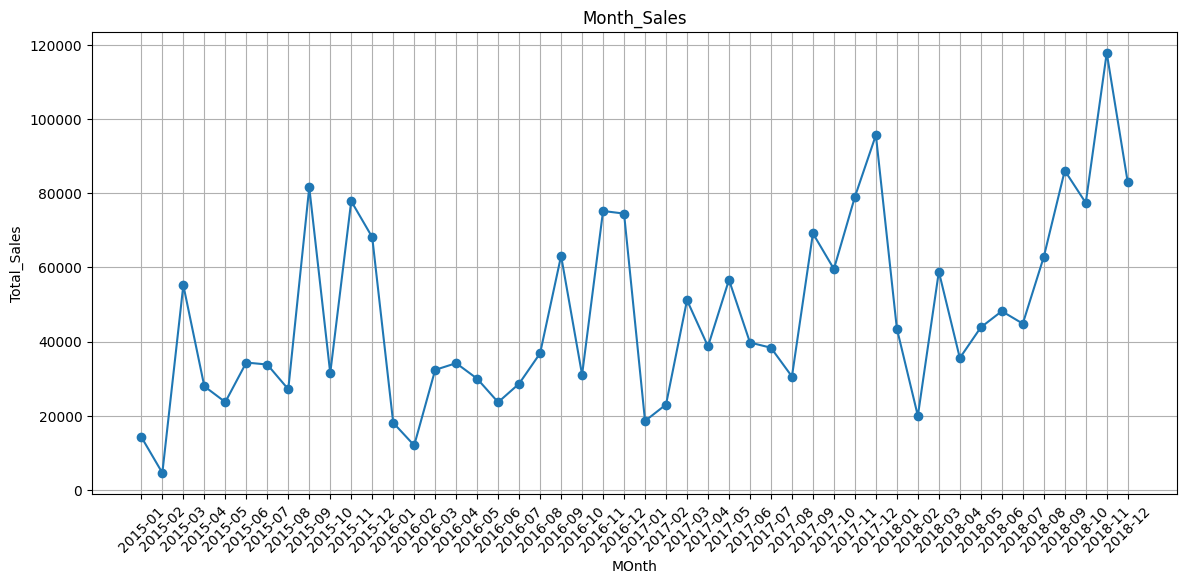

In [26]:
## What is the impact of seasonal trends on the demand for different items?
## ما هو تأثير الاتجاهات الموسمية على طلبات الأصناف المختلفة؟

import matplotlib.pyplot as plt

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
seasonal_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(14, 6))
plt.plot(seasonal_sales.index.astype(str), seasonal_sales.values, marker='o')
plt.title('Month_Sales')
plt.xlabel('MOnth')
plt.ylabel('Total_Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

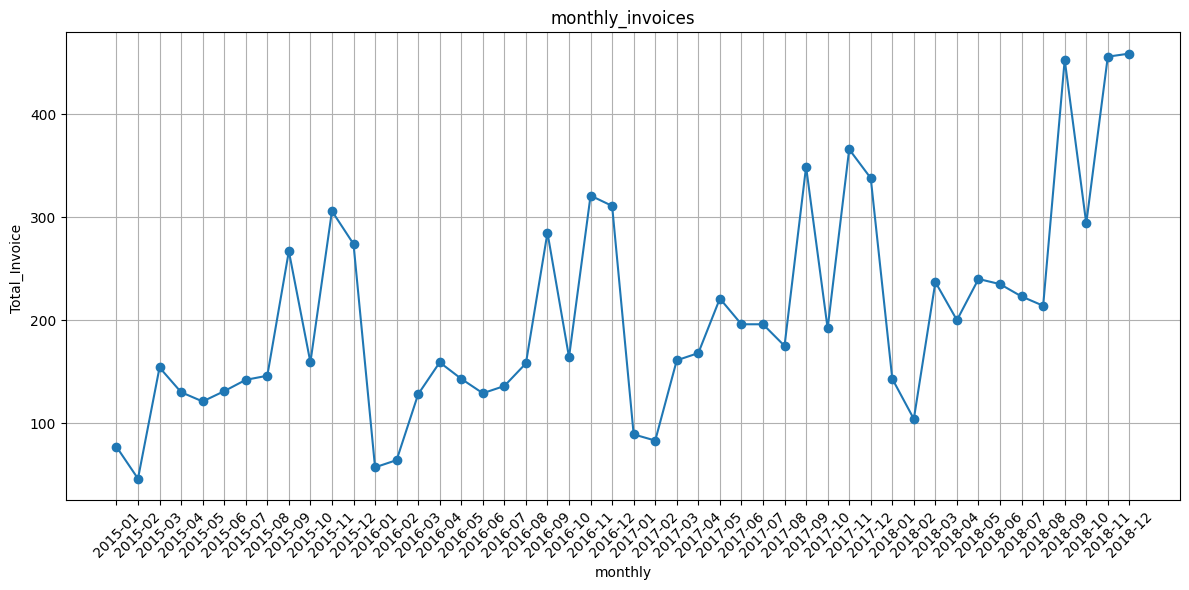

In [27]:
# حساب عدد الفواتير المصدرة لكل شهر

monthly_invoices = df.groupby(df['Order_Date'].dt.to_period('M'))['OrderID'].count()

plt.figure(figsize=(12, 6))
plt.plot(monthly_invoices.index.astype(str), monthly_invoices.values, marker='o')
plt.title('monthly_invoices')
plt.xlabel('monthly')
plt.ylabel('Total_Invoice ')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  
plt.show()

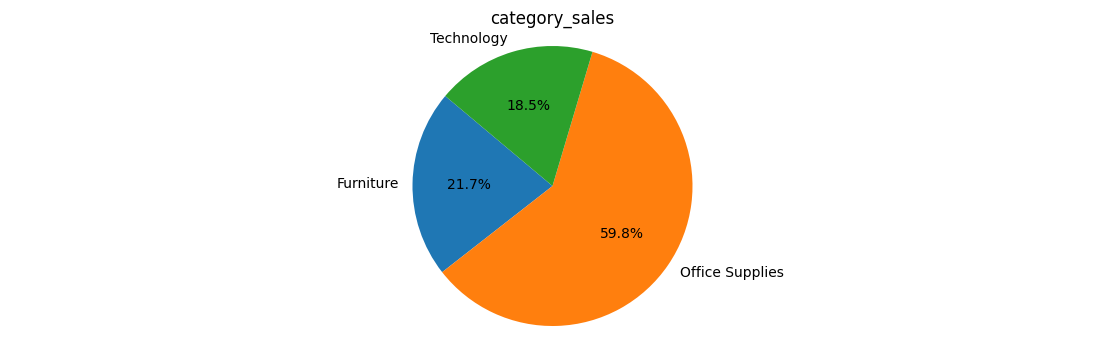

In [28]:
## How are sales distributed according to the different categories of items?
## كيف تتوزع المبيعات حسب الفئات المختلفة للأصناف؟

category_sales = df.groupby('Category')['OrderID'].count()

plt.figure(figsize=(14, 4))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('category_sales')
plt.axis('equal')
plt.show()

In [32]:
d = pd.DataFrame({
    'Product_Name': df['Product_Name'].str[0:5],
    'Product_ID': df['Product_ID']
})

d

,Product_Name,Product_ID
0,Defle,10000277
1,Space,10003641
2,Logit,10001998
3,Chrom,10001932
4,SanDi,10002323
...,...,...
9795,Adams,10001838
9796,Acco,10000124
9797,Inter,10003567
9798,Hon E,10004997


In [33]:
d["Product_Name"] = df['Product_Name'].str.replace(" ", "")
d["Product_Name"] = d["Product_Name"].str[0:20]
d = pd.DataFrame(d)
d["Product_ID"] = df['Product_ID']
d

,Product_Name,Product_ID
0,Deflect-oDuraMatAnti,10000277
1,SpaceSolutionsIndust,10003641
2,Logitech LS21Speaker,10001998
3,"Chromcraft48""x96""Rac",10001932
4,SanDiskUltra32GBMicr,10002323
...,...,...
9795,AdamsTelephoneMessag,10001838
9796,Acco6OutletGuardianB,10000124
9797,Inter-OfficeRecycled,10003567
9798,HonEvery-DaySeriesMu,10004997


In [34]:
top_products = df['Product_ID'].value_counts().nlargest(10)
top_products.columns = ['Product_ID', 'Count']
merged_data = pd.merge(top_products, d, on='Product_ID')
merged_data.drop_duplicates(inplace=True)


In [35]:
top_products

Product_ID
10001972    24
10003441    24
10000474    24
10003832    23
10001095    21
10002049    20
10004093    19
10002335    19
10001539    19
10004071    19
Name: count, dtype: int64

In [36]:
merged_data

,Product_ID,count,Product_Name
0,10001972,24,Newell323
24,10003441,24,BushWestfieldCollect
48,10000474,24,AveryRecycledFlexi-V
72,10003832,23,EldonExpressionsPunc
95,10001095,21,ChromcraftRoundConfe
116,10002049,20,LogitechG19Programma
136,10004093,19,Avery486
155,10002335,19,DIXONOriolePencils
174,10001539,19,ChromcraftRectangula
193,10004071,19,EatonPremiumContinuo


C:\Users\IT\AppData\Local\Temp\ipykernel_10708\539923903.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens_r', len(top_products))


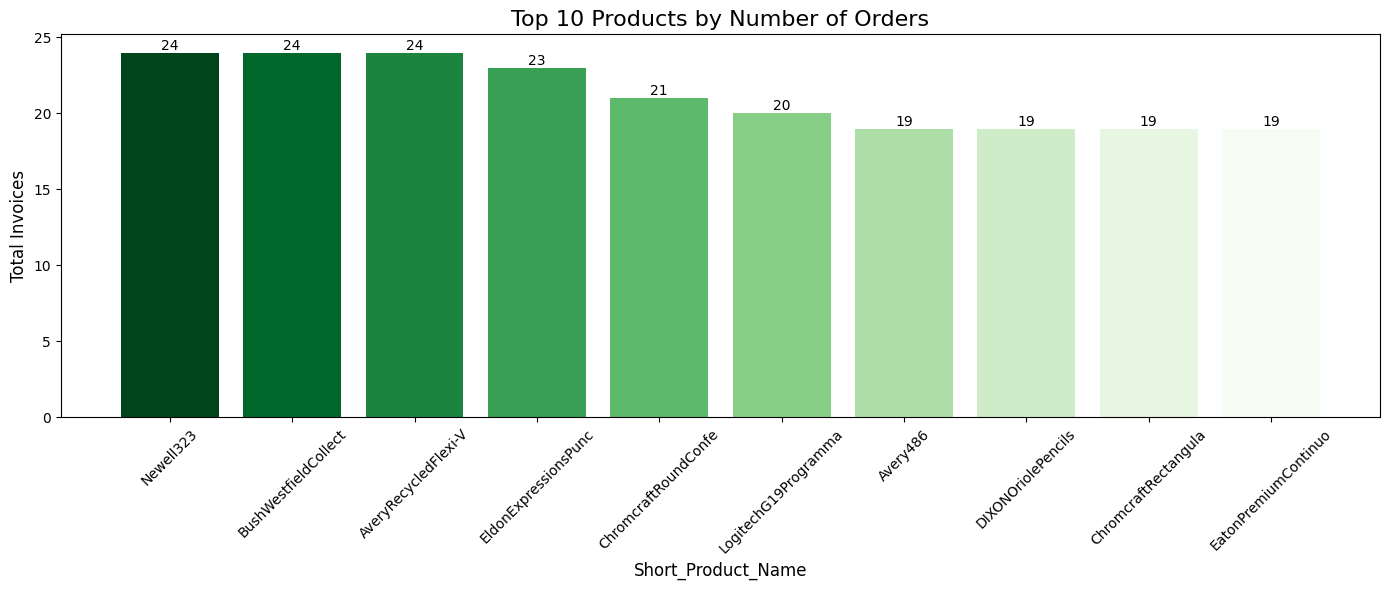

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# What are the most requested items based on the invoices (OrderID)?
## ما هي الأصناف الأكثر طلبًا بناءً على الفواتير (OrderID)؟

top_products = df['Product_ID'].value_counts().nlargest(10)

cmap = cm.get_cmap('Greens_r', len(top_products))

# إنشاء الرسم البياني مع الألوان المتدرجة
plt.figure(figsize=(14, 6))
#bars = merged_data.plot(kind='bar', color=cmap(range(len(top_products))))
bars = plt.bar(merged_data['Product_Name'], merged_data['count'], color=cmap(range(len(top_products))))



# إضافة عدد الفواتير (عدد الطلبات) لكل صنف
for bar in bars.patches:
    plt.annotate(
        int(bar.get_height()),  # نص العدد
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # موضع النص
        ha='center',  
        va='bottom',  
        fontsize=10,
        color='black'
    )

# إعدادات الرسم البياني
plt.title('Top 10 Products by Number of Orders', fontsize=16)
plt.xlabel('Short_Product_Name', fontsize=12)
plt.ylabel('Total Invoices', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.savefig('my_plot.png')  # Save as PNG file
plt.show()


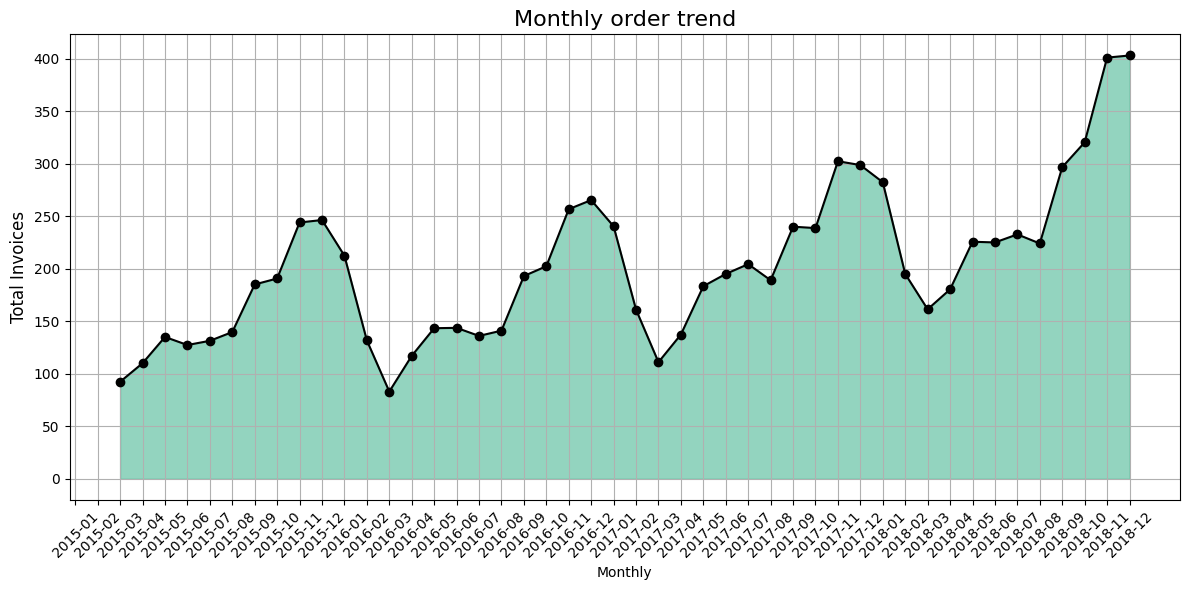

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
## How do changes in demand affect inventory levels?
## كيف تؤثر التغيرات في الطلبات على مستويات المخزون؟

# حساب اتجاهات الطلبات بمرور الوقت مع متوسط متحرك لمدة 3 أشهر
order_trends = df.groupby(df['Order_Date'].dt.to_period('M'))['Product_ID'].count().rolling(window=3).mean()

# إنشاء الرسم البياني المساحي
plt.figure(figsize=(12, 6))
plt.fill_between(order_trends.index.astype(str), order_trends.values, color='#66C2A5', alpha=0.7)

# إضافة علامات
plt.plot(order_trends.index.astype(str), order_trends.values, marker='o', color='black')

# إعدادات الرسم البياني
plt.title('Monthly order trend', fontsize=16)
plt.xlabel('Monthly', fontsize=10)
plt.ylabel('Total Invoices', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# عرض الرسم
plt.tight_layout()
plt.show()


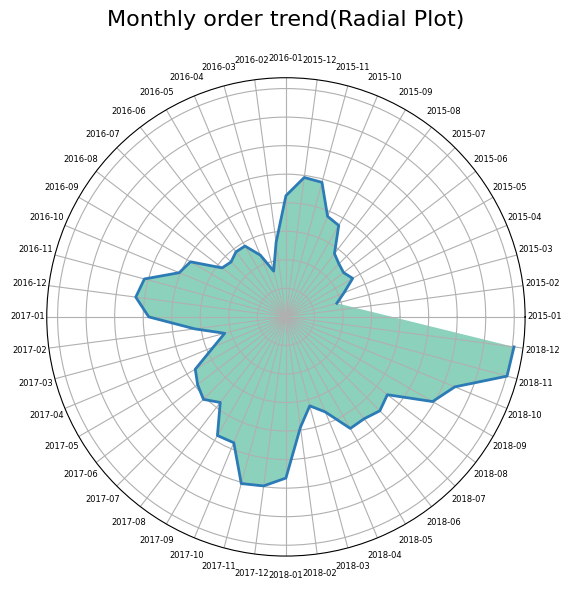

In [39]:
import matplotlib.pyplot as plt
import numpy as np
### How do changes in demand affect inventory levels?
## كيف تؤثر التغيرات في الطلبات على مستويات المخزون؟

order_trends = df.groupby(df['Order_Date'].dt.to_period('M'))['Product_ID'].count().rolling(window=3).mean()

# تحويل الأشهر إلى درجات (زاوية)
angles = np.linspace(0, 2 * np.pi, len(order_trends), endpoint=False).tolist()

# تكرار أول قيمة لإغلاق الدائرة
values = order_trends.values.tolist()
values += values[:1]
angles += angles[:1]

# إنشاء الرسم الشعاعي
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# رسم المخطط
ax.fill(angles, values, color='#66C2A5', alpha=0.75)
ax.plot(angles, values, color='#2C7BB6', linewidth=2)

# إضافة خصائص التجميل
ax.set_yticklabels([])  # إخفاء التسميات على المحور العمودي
ax.set_xticks(angles[:-1])
ax.set_xticklabels(order_trends.index.astype(str), fontsize=6)

# إعدادات العنوان
plt.title('Monthly order trend(Radial Plot)', fontsize=16, pad=20)

plt.tight_layout()
plt.show()


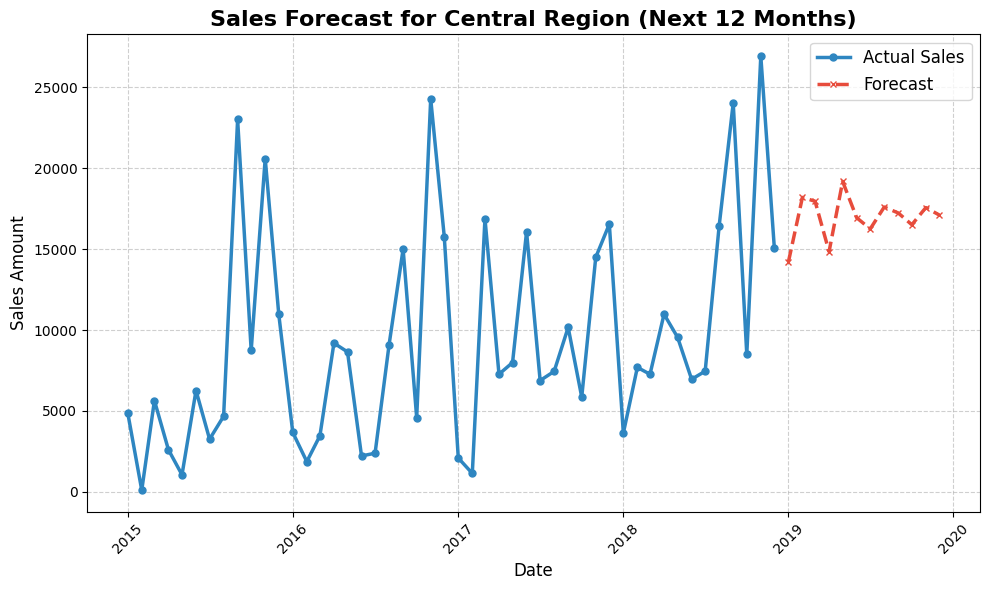

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
### What are the sales forecasts for each geographical region over the next 6 to 12 months?
###  ما هي توقعات المبيعات لكل منطقة جغرافية خلال الـ 6-12 شهرًا القادمة؟


# تجميع المبيعات حسب التاريخ والمنطقة
sales_region = df.groupby([df['Order_Date'].dt.to_period('M'), 'Region'])['Amount'].sum().unstack()

# تحويل الفترات الزمنية إلى تواريخ
sales_region.index = sales_region.index.to_timestamp()

# تحديد منطقة معينة للتنبؤ بها
region_sales = sales_region['Central']

# تحويل الفهرس إلى تواريخ صحيحة من نوع DatetimeIndex
region_sales.index = pd.to_datetime(region_sales.index)

# بناء النموذج
model = ARIMA(region_sales, order=(5, 1, 0))  # (p,d,q) حيث p هو الفرق الزمني, d التكامل, و q الخطأ
model_fit = model.fit()

# التنبؤ بالفترات المستقبلية
forecast = model_fit.forecast(steps=12)  # 12 شهراً

# إنشاء فهرس زمني للفترات المستقبلية
forecast_index = pd.date_range(start=region_sales.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# تحسين الرسم البياني
plt.figure(figsize=(10, 6))  # تكبير حجم الرسم
plt.plot(region_sales.index, region_sales, label='Actual Sales', color='#2E86C1', linewidth=2.5, marker='o', markersize=5)  # رسم البيانات الفعلية مع نقاط دائرية
plt.plot(forecast_index, forecast, label='Forecast', color='#E74C3C', linestyle='--', linewidth=2.5, marker='x', markersize=5)  # رسم التنبؤ بخطوط متقطعة ونقاط X

# إضافة شبكة خفيفة
plt.grid(True, linestyle='--', alpha=0.6)

# تعديل العناوين وحجم النصوص
plt.title('Sales Forecast for Central Region (Next 12 Months)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)

# تحسين حدود الرسم البياني
plt.tight_layout()

# عرض الرسم البياني
plt.show()


In [42]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


عدد الطلبات لكل فترة شحن:
shipping_delay
0     514
1     363
2    1295
3     978
4    2718
5    2147
6    1170
7     615
Name: OrderID, dtype: int64


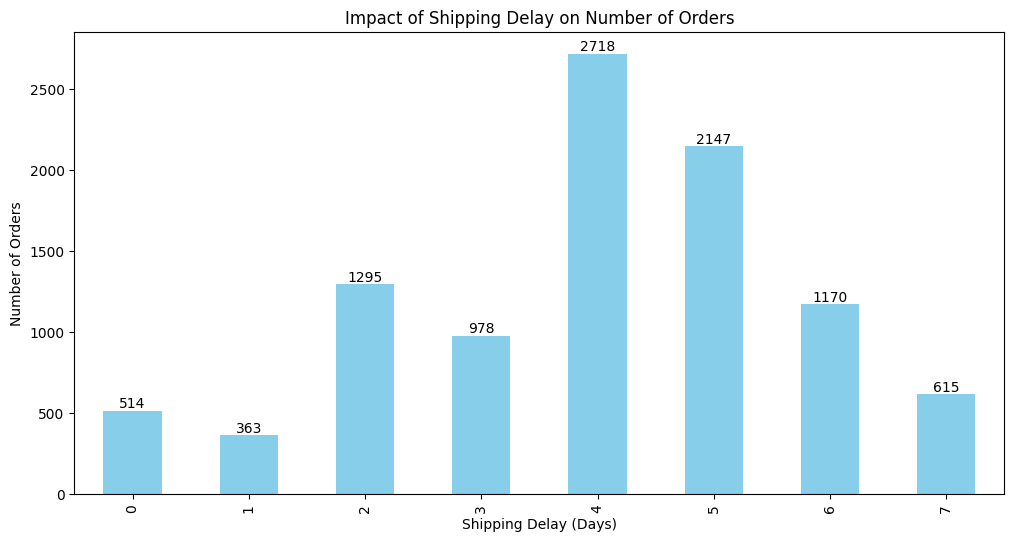

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# تحويل الأعمدة إلى نوع datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# حساب فترة الشحن (عدد الأيام بين تاريخ الشحن وتاريخ الطلب)
df['shipping_delay'] = (df['Ship_Date'] - df['Order_Date']).dt.days

# تجميع البيانات حسب فترة الشحن
shipping_effect = df.groupby('shipping_delay')['OrderID'].count()

# طباعة عدد الطلبات لكل فترة شحن
print("عدد الطلبات لكل فترة شحن:")
print(shipping_effect)

# رسم البيانات
plt.figure(figsize=(12, 6))
bars = shipping_effect.plot(kind='bar', color='skyblue')
plt.title('Impact of Shipping Delay on Number of Orders')
plt.xlabel('Shipping Delay (Days)')
plt.ylabel('Number of Orders')

# إضافة عدد الطلبات فوق كل عمود
for bar in bars.patches:
    bars.annotate(bar.get_height(), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', 
                  va='bottom')

plt.show()


In [25]:
!pip install geopy


In [26]:
!pip install geocoder 

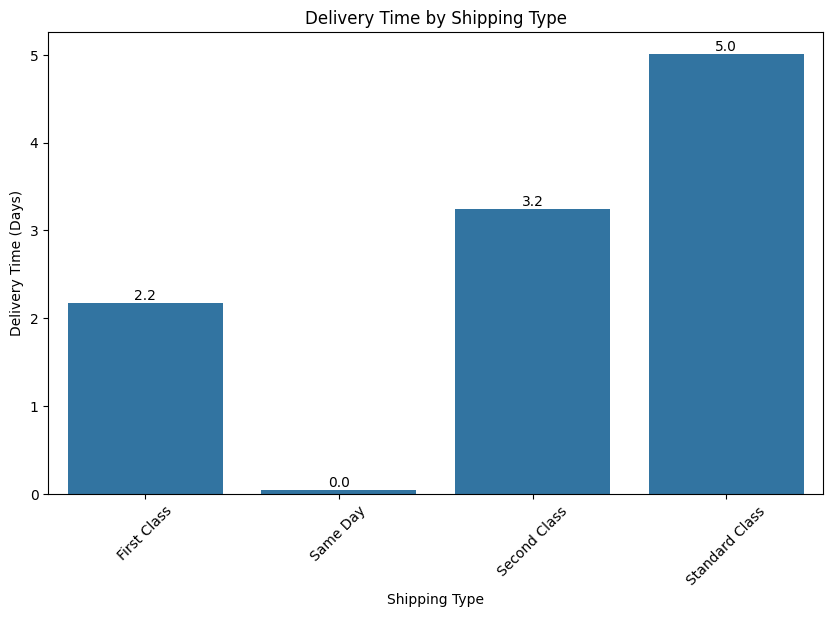

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## كيف يؤثر نوع الشحن على سرعة التسليم ورضا العملاء؟

# حساب زمن التسليم حسب نوع الشحن
delivery_time = df.groupby('Ship_Mode')['shipping_delay'].mean().reset_index()

# رسم البيانات
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Ship_Mode', y='shipping_delay', data=delivery_time)

# إضافة زمن التسليم فوق كل عمود
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}',  # عرض القيم مع منزلة عشرية واحدة
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', 
                  va='bottom')


plt.title('Delivery Time by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Delivery Time (Days)')
plt.xticks(rotation=45)  # جعل العناوين مائلة لتحسين القراءة
plt.show()


In [28]:
!pip install pmdarima
from pmdarima import auto_arima


C:\Users\IT\AppData\Local\Temp\ipykernel_4704\2810183100.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_sales = total_sales.resample('M').sum()  # إعادة تشكيل البيانات شهريًا


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1096.560, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1089.579, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1084.886, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1094.708, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1086.890, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1087.498, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1087.606, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1083.594, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1084.585, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1084.690, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1088.071, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1086.217, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.314 seconds
                           

C:\Users\IT\AppData\Local\Temp\ipykernel_4704\2810183100.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=total_sales.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


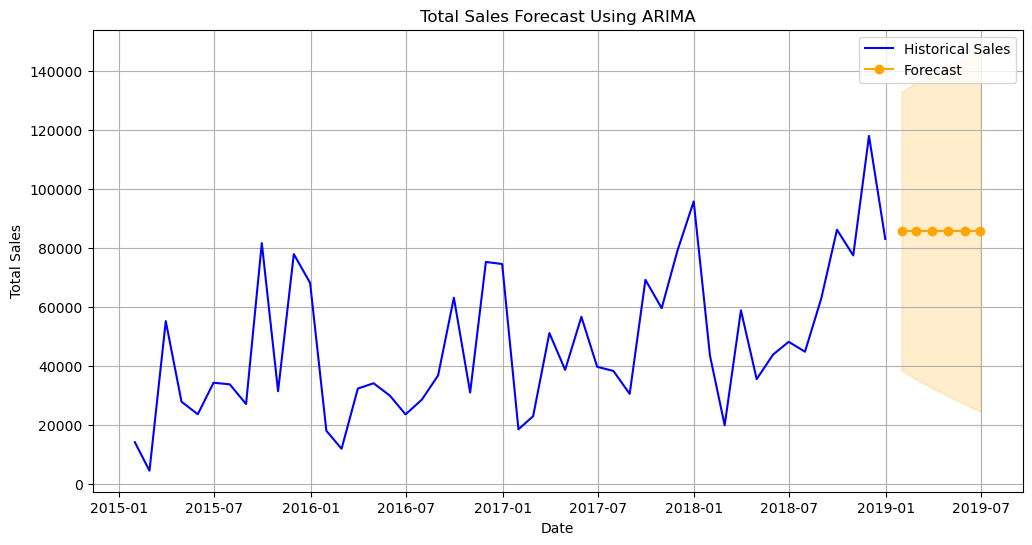

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
### تنبؤ بالمبيعات بناءً على تاريخ الطلب وأنواع المنتجات


# تجميع إجمالي المبيعات حسب التاريخ
total_sales = df.groupby('Order_Date')['Amount'].sum().reset_index()

# تعيين تاريخ الطلب كمؤشر
total_sales.set_index('Order_Date', inplace=True)

# إعادة تشكيل البيانات لتكون سلسلة زمنية
total_sales = total_sales.resample('M').sum()  # إعادة تشكيل البيانات شهريًا

# استخدام auto_arima لاختيار النموذج الأفضل
model = auto_arima(total_sales['Amount'], seasonal=False, stepwise=True, trace=True)

# ملخص النموذج
print(model.summary())

# التنبؤ بالمبيعات لمدة 6 أشهر قادمة
forecast, conf_int = model.predict(n_periods=6, return_conf_int=True)

# إعداد البيانات للتصوير
forecast_index = pd.date_range(start=total_sales.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# رسم البيانات
plt.figure(figsize=(12, 6))
plt.plot(total_sales.index, total_sales['Amount'], label='Historical Sales', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='orange', marker='o')
plt.fill_between(forecast_series.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2)  # Confidence Interval
plt.title('Total Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()


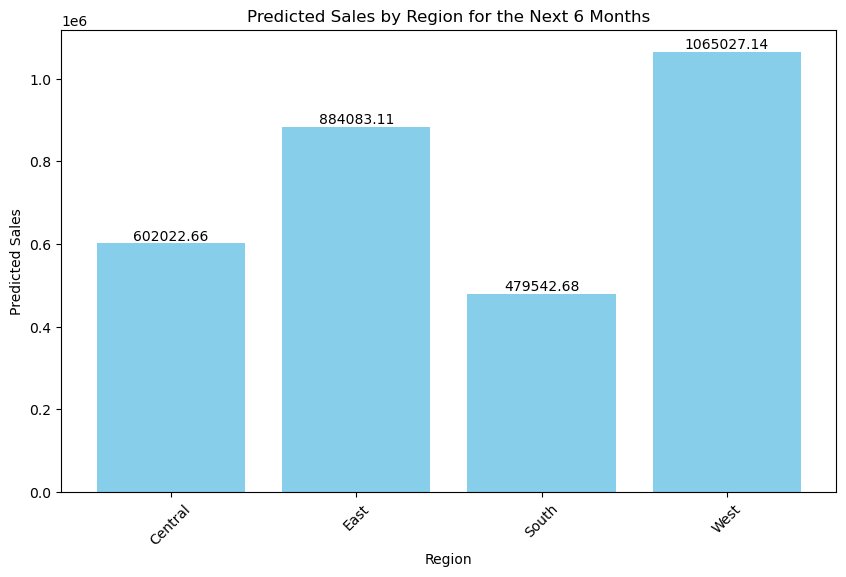

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# افترض أن لديك DataFrame df مع الأعمدة 'Region' و 'Amount'

# استخدام الانحدار لتحليل تأثير المنطقة الجغرافية على المبيعات
X = df[['Region']]
y = df['Amount']

# تحويل البيانات النصية إلى أرقام باستخدام التشفير
X_encoded = pd.get_dummies(X, drop_first=True)

# بناء النموذج
model = LinearRegression()
model.fit(X_encoded, y)

# توقع المبيعات لكل منطقة
y_pred = model.predict(X_encoded)

# إضافة نتائج التوقعات إلى DataFrame
df['Predicted_Sales'] = y_pred

# حساب إجمالي المبيعات المتوقعة لكل منطقة
predicted_sales_by_region = df.groupby('Region')['Predicted_Sales'].sum().reset_index()

# إعداد بيانات التوقعات المستقبلية (على سبيل المثال، 6 أشهر قادمة)
future_months = 6
future_sales = pd.DataFrame({
    'Region': predicted_sales_by_region['Region'],
    'Predicted_Sales': predicted_sales_by_region['Predicted_Sales'] * (1 + 0.05) ** future_months  # فرضية زيادة 5% شهريًا
})

# رسم البيانات
plt.figure(figsize=(10, 6))
bars = plt.bar(future_sales['Region'], future_sales['Predicted_Sales'], color='skyblue')

# إضافة المبيعات المتوقعة فوق كل عمود
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}',  # عرض القيم مع منزلة عشرية واحدة
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', 
                 va='bottom')

# إعدادات الرسم البياني
plt.title('Predicted Sales by Region for the Next 6 Months')
plt.xlabel('Region')
plt.ylabel('Predicted Sales')
plt.xticks(rotation=45)  # جعل العناوين مائلة لتحسين القراءة
plt.show()


In [31]:
# حساب إجمالي المبيعات
total_sales = df['Amount'].sum()

# طباعة إجمالي المبيعات
print("إجمالي المبيعات:", total_sales)


إجمالي المبيعات: 2261536.7827


Predicted Total Sales: 2246627.9609060287


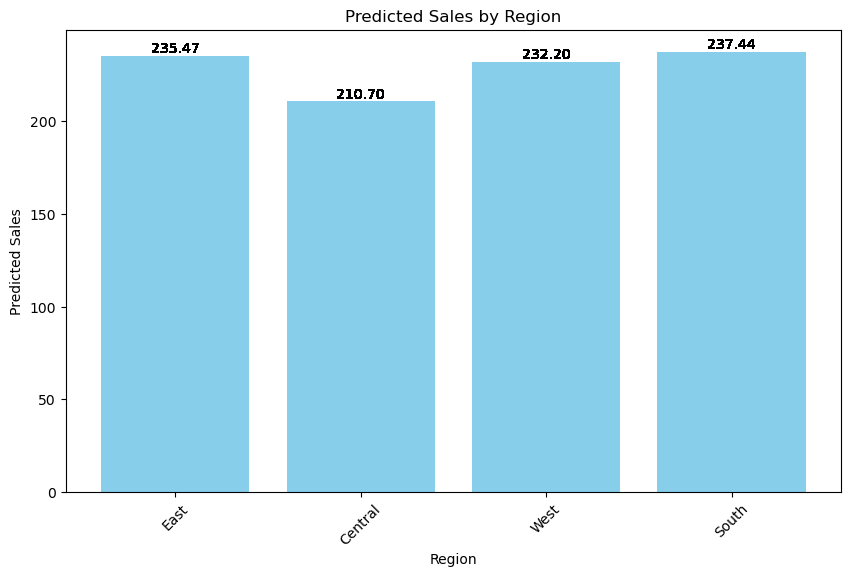

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# افترض أن لديك DataFrame df مع الأعمدة 'Region' و 'Amount'

# حساب عدد الطلبات لكل منطقة
df['Order_Count'] = df.groupby('Region')['Amount'].transform('count')

# تحويل البيانات النصية إلى أرقام باستخدام التشفير
X = df[['Region', 'Order_Count']]
y = df['Amount']

X_encoded = pd.get_dummies(X, drop_first=True)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# بناء نموذج Random Forest
model = RandomForestRegressor(n_estimators=200, max_depth=10 ,random_state=42)
model.fit(X_train, y_train)

# توقع المبيعات
y_pred = model.predict(X_encoded)

# إضافة نتائج التوقعات إلى DataFrame
df['Predicted_Sales'] = y_pred

# حساب إجمالي المبيعات المتوقعة
predicted_sales_total = df['Predicted_Sales'].sum()
print("Predicted Total Sales:", predicted_sales_total)

# رسم المبيعات المتوقعة
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Region'], df['Predicted_Sales'], color='skyblue')
plt.title('Predicted Sales by Region')
plt.xlabel('Region')
plt.ylabel('Predicted Sales')
plt.xticks(rotation=45)

# إضافة المبيعات المتوقعة فوق كل عمود
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}',  # عرض القيم مع منزلة عشرية واحدة
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', 
                 va='bottom')

plt.show()


In [82]:
df.sample(3)

,RowID,OrderID,Product_ID,Customer_ID,Amount,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Category,Sub_Category,Product_Name,shipping_delay,Predicted_Sales,Order_Count
8100,8101,161445,10001953,12610,140.736,2016-09-07,2016-09-09,Second Class,Corey Catlett,Corporate,United States,Durham,North Carolina,South,Office Supplies,Art,Boston 1645 Deluxe Heavier-Duty Electric Penci...,2,237.435435,1483
9732,9733,131807,10004052,14650,15.800,2018-10-05,2018-10-10,Standard Class,Greg Guthrie,Corporate,United States,Los Angeles,California,West,Office Supplies,Appliances,Hoover Replacement Belts For Soft Guard & Comm...,5,232.201056,3334
4379,4380,106859,10001815,11215,288.240,2018-03-13,2018-03-18,Second Class,Benjamin Farhat,Home Office,United States,New York City,New York,East,Office Supplies,Paper,Xerox 1885,5,235.474735,2843
